In [1]:
import sys

sys.path.append('/glade/work/chuyan/Research/Cloud_CCFs_RMs_Tan_et_al_2023_JGR-A__')

In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
# import PyNIO as Nio #deprecated
import pandas as pd
import glob
from scipy.stats import *
from copy import deepcopy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from area_mean import *
from scipy.optimize import curve_fit
# import seaborn as sns
from copy import deepcopy
from useful_func_cy import *

### Fig 10:
Probability density function of 40^{o}S - 85^{o}S SW_{FB} with constraint range:

In [3]:
# model list

exp = 'piControl'
    
# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 20 (18, ACCESS10, ACCESS13)
ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

# cmip5 + cmip6 (50):
deck3 = [CESM2WACCMFV2, CESM2FV2, TaiESM1, CESM2WACCM, CESM2, SAM0, E3SM10, CMCCCM2SR5, NorESM1M, GFDLCM3, CCSM4, GISSE2H, ECEarth3, GISSE21H, BNUESM, GFDLCM4, CNRMESM21, ECEarth3Veg, IPSLCM5ALR, BCCESM1, CNRMCM61, CNRMCM61HR, MRICGCM3, FGOALSg2, GISSE22G, IPSLCM6ALR, GISSE2R, GISSE21G, bcccsm11, NESM3, NorESM2MM, MRIESM20, CanESM5, FGOALSg3, MIROCES2L, MIROC5, CanESM2, AWICM11MR, MIROC6, FGOALSs2, CSIRO_Mk360, INM_CM48, CNRMCM5, CAMSCSM1, MIROCESM, GFDLESM2G, MPIESM12LR, MPIESMLR, GFDLESM2M, MPIESMMR]
deck3_nas = ['CESM2WACCMFV2', 'CESM2FV2', 'TaiESM1', 'CESM2WACCM', 'CESM2', 'SAM0', 'E3SM10', 'CMCCCM2SR5', 'NorESM1M', 'GFDLCM3', 'CCSM4', 'GISSE2H', 'ECEarth3', 'GISSE21H', 'BNUESM', 'GFDLCM4', 'CNRMESM21', 'ECEarth3Veg', 'IPSLCM5ALR', 'BCCESM1', 'CNRMCM61', 'CNRMCM61HR', 'MRICGCM3', 'FGOALSg2', 'GISSE22G', 'IPSLCM6ALR', 'GISSE2R', 'GISSE21G', 'bcccsm11', 'NESM3', 'NorESM2MM', 'MRIESM20', 'CanESM5', 'FGOALSg3', 'MIROCES2L', 'MIROC5', 'CanESM2', 'AWICM11MR', 'MIROC6', 'FGOALSs2', 'CSIRO_Mk360', 'INM_CM48', 'CNRMCM5', 'CAMSCSM1', 'MIROCESM', 'GFDLESM2G', 'MPIESM12LR', 'MPIESMLR', 'GFDLESM2M', 'MPIESMMR']

In [4]:
# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9

path_data = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
path_plot = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/plot_file/'

In [5]:
# Read CMIP5/ CMIP6 cloud feedbacks data:

fn_cmip5 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/CMIP5_cld_fbks.nc'

fn_cmip6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/CMIP6_cld_fbkd_July12.nc'

# glob.glob(fn_cmip5)
f_cmip5 = nc.Dataset(fn_cmip5, 'r')

f_cmip6 = nc.Dataset(fn_cmip6, 'r')

# print(f_cmip5.variables['model'])

In [6]:
# variables from Zelinka's SWfb files:
lat_mz = np.asarray(f_cmip6.variables['latitude'])
bound_lat_mz = np.asarray(f_cmip6.variables['bounds_latitude'])

lon_mz = np.asarray(f_cmip6.variables['longitude'])
bound_lon_mz = np.asarray(f_cmip6.variables['bounds_longitude'])

# convert longitude matrix from (0, 360) to (-180., 180.):
lon_mz2 = lon_mz[:]*1.
bound_lon_mz2 = bound_lon_mz[:] * 1.
lon_mz2[lon_mz2 > 180] = lon_mz2[lon_mz2 > 180]-360.
bound_lon_mz2[bound_lon_mz2 > 180] = bound_lon_mz2[bound_lon_mz2 > 180] - 360
ind_lon = argsort(lon_mz2)
lon_mz2 = lon_mz2[ind_lon]

bound_lon_mz2 = bound_lon_mz2[ind_lon, :]
# print(lon_mz2)
# print(bound_lon_mz2)
# model_names:
cmip6model_nas = f_cmip6.variables['model'].long_name
cmip5model_nas = f_cmip5.variables['model'].long_name

cmip6_nas = cmip6model_nas[1:-1].split()
for i in range(len(cmip6_nas)):
    cmip6_nas[i] = cmip6_nas[i][1:-1]
    
cmip5_nas = cmip5model_nas[1:-1].split()
for i in range(len(cmip5_nas)):
    cmip5_nas[i] = cmip5_nas[i][1:-1]
# print(cmip6_nas)
# print(cmip5_nas)

model_nas = []
model_nas = np.append(cmip6_nas, cmip5_nas)
print(model_nas)

# SW_cloud_Feedback:
sw_cld_fb_mz = []

cmip6_sw_cld_fb_mz = np.asarray(f_cmip6.variables['SWCLD_fbk6_map'])
cmip5_sw_cld_fb_mz = np.asarray(f_cmip5.variables['SWCLD_fbk5_map'])

sw_cld_fb_mz = np.append(cmip6_sw_cld_fb_mz, cmip5_sw_cld_fb_mz, axis = 2)
print(sw_cld_fb_mz.shape)

# Handle nan value
sw_cld_fb_mz = np.where(sw_cld_fb_mz!=1.e+20, sw_cld_fb_mz, np.nan)
ind_nan = np.isnan(sw_cld_fb_mz)
# print(np.nonzero(ind_nan==True))  # #0

reshape_sw_cld_fb = np.transpose(sw_cld_fb_mz,(2, 0, 1))

print(reshape_sw_cld_fb.shape)
# SO_sw_cldfb = area_mean(reshape_sw_cld_fb[:,(latsi0):(latsi1+1+1),:], y_range_swcld, x_range_swcld) # -85.S ~ -40.S
SO_sw_cldfb = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-85., -40.])
# SO_sw_cldfb_5085 = area_mean(reshape_sw_cld_fb[:,(latsi0):(latsi2+1+1),:], y_range_swcld5085, x_range_swcld) # -85.S ~ -50.S
SO_sw_cldfb_5085 = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-85., -50.])
# SO_sw_cldfb_4050 = area_mean(reshape_sw_cld_fb[:,(latsi2+1):(latsi1+1+1),:], y_range_swcld4050, x_range_swcld) # -50.S ~ -40.S
SO_sw_cldfb_4050 = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-50., -40.])

print(SO_sw_cldfb.shape)

# The 50 GCMs' SW_FB at different Latitude Bands:
SW_FB_4085 = []
SW_FB_5085 = []
SW_FB_4050 = []

for i in range(len(deck3)):
    for j in range(len(SO_sw_cldfb)):
        # 50
        if (deck3[i]['modn']== model_nas[j]):
            # if (i in modelconstraintbystep1_nas):
            SW_FB_4085 = np.append(SW_FB_4085, SO_sw_cldfb[j])
            SW_FB_4050 = np.append(SW_FB_4050, SO_sw_cldfb_4050[j])
            SW_FB_5085 = np.append(SW_FB_5085, SO_sw_cldfb_5085[j])
        
print(SW_FB_4085.shape)

['ACCESS-CM2' 'ACCESS-ESM1-5' 'AWI-CM-1-1-MR' 'BCC-CSM2-MR' 'BCC-ESM1'
 'CAMS-CSM1-0' 'CESM2' 'CESM2-FV2' 'CESM2-WACCM' 'CESM2-WACCM-FV2' 'CIESM'
 'CMCC-CM2-SR5' 'CMCC-ESM2' 'CNRM-CM6-1' 'CNRM-CM6-1-HR' 'CNRM-ESM2-1'
 'CanESM5' 'E3SM-1-0' 'EC-Earth3' 'EC-Earth3-AerChem' 'EC-Earth3-Veg'
 'FGOALS-f3-L' 'FGOALS-g3' 'GFDL-CM4' 'GFDL-ESM4' 'GISS-E2-1-G'
 'GISS-E2-1-H' 'GISS-E2-2-G' 'HadGEM3-GC31-LL' 'HadGEM3-GC31-MM'
 'IITM-ESM' 'INM-CM4-8' 'INM-CM5-0' 'IPSL-CM5A2-INCA' 'IPSL-CM6A-LR'
 'IPSL-CM6A-LR-INCA' 'KACE-1-0-G' 'MIROC-ES2L' 'MIROC6' 'MPI-ESM-1-2-HAM'
 'MPI-ESM1-2-HR' 'MPI-ESM1-2-LR' 'MRI-ESM2-0' 'NESM3' 'NorCPM1'
 'NorESM2-LM' 'NorESM2-MM' 'SAM0-UNICON' 'TaiESM1' 'UKESM1-0-LL'
 'ACCESS1-0' 'ACCESS1-3' 'BNU-ESM' 'CCSM4' 'CNRM-CM5' 'CSIRO-Mk3-6-0'
 'CanESM2' 'FGOALS-g2' 'FGOALS-s2' 'GFDL-CM3' 'GFDL-ESM2G' 'GFDL-ESM2M'
 'GISS-E2-H' 'GISS-E2-R' 'HadGEM2-ES' 'IPSL-CM5A-LR' 'IPSL-CM5A-MR'
 'IPSL-CM5B-LR' 'MIROC-ESM' 'MIROC5' 'MPI-ESM-LR' 'MPI-ESM-MR' 'MPI-ESM-P'
 'MRI-CGCM3' 'NorESM1-M' 'N

# sorted SO SW cloud feedback:

In [7]:
sorted_SOSWCLD_index = sorted(range(50), key = lambda index: SW_FB_4085[index], reverse = True)
print(sorted_SOSWCLD_index)

ordinal_sorted_SOSWCLD = [sorted_SOSWCLD_index.index(i) for i in range(50)]

print(ordinal_sorted_SOSWCLD)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [15]:
deck4 = []
deck_nas4 = []

for i in range(len(deck3)):
    
    # print(deck3_nas[sorted_SOSWCLD_index[i]])
    deck4.append(deck3[sorted_SOSWCLD_index[i]])
    deck_nas4.append(deck3_nas[sorted_SOSWCLD_index[i]])
    
print(SW_FB_4085[sorted_SOSWCLD_index])

print(sorted(SO_sw_cldfb, reverse = True))

[ 1.52770246  1.21259446  1.10238329  0.76889119  0.66571835  0.57282465
  0.57005512  0.23299922 -0.04742896 -0.07059348 -0.15410108 -0.16023765
 -0.23915645 -0.23981515 -0.28330926 -0.30823915 -0.31042399 -0.33767653
 -0.34825546 -0.37056604 -0.37128178 -0.3963994  -0.4590894  -0.46449433
 -0.48081179 -0.48137357 -0.59894597 -0.60610591 -0.66276868 -0.67519632
 -0.68003979 -0.6858539  -0.7338598  -0.81323349 -0.86082588 -0.92571557
 -0.94813628 -0.95840175 -1.02865439 -1.03569614 -1.03899643 -1.05858408
 -1.07141221 -1.22398444 -1.25014399 -1.46031041 -1.47836139 -1.49109229
 -1.5174983  -1.56804822]
[1.527702463828204, 1.2125944572891378, 1.10238329460617, 0.8478378247842285, 0.768891193158363, 0.6825341865974718, 0.6657183543902879, 0.6184093724428994, 0.5804278721707453, 0.5728246466396423, 0.5700551196330336, 0.5250000317528501, 0.3836103396795972, 0.2329992179606706, 0.21167517085656323, 0.0987581734580207, 0.029139206226381244, -0.04742895812892245, -0.048667377806987176, -0.07

In [24]:
for i in range(len(deck_nas4)):
    
    print(i+1, deck4[i]['modn'],  SW_FB_4085[i], ' | ',  SW_FB_4085[i]*ratio_4085)

1 CESM2-WACCM-FV2 1.527702463828204  |  0.2699504398454928
2 CESM2-FV2 1.2125944572891378  |  0.21426973828342274
3 TaiESM1 1.10238329460617  |  0.19479503522665265
4 CESM2-WACCM 0.768891193158363  |  0.13586579893725106
5 CESM2 0.6657183543902879  |  0.11763479266148846
6 SAM0-UNICON 0.5728246466396423  |  0.10122014526782856
7 E3SM-1-0 0.5700551196330336  |  0.10073076002999597
8 CMCC-CM2-SR5 0.2329992179606706  |  0.041171787610085324
9 NorESM1-M -0.04742895812892245  |  -0.008380864999217462
10 GFDL-CM3 -0.07059348059550354  |  -0.012474118218823167
11 CCSM4 -0.15410107535731563  |  -0.0272302061810701
12 GISS-E2-H -0.16023764979272903  |  -0.028314560633070737
13 EC-Earth3 -0.23915645144877945  |  -0.04225979258991711
14 GISS-E2-1-H -0.23981515101868076  |  -0.0423761871384834
15 BNU-ESM -0.283309260516837  |  -0.050061750438743724
16 GFDL-CM4 -0.3082391501249429  |  -0.05446695028907567
17 CNRM-ESM2-1 -0.3104239898401862  |  -0.054853019210273773
18 EC-Earth3-Veg -0.3376765270459

# Constraint on 40-50 & 50-85 latitude band averaged shortwave cloud feedback:

In [7]:
# The area ratio of 3 latitude bands' to the global earth's surface area.:
R = 6.3781 * 10**6
S_global_sfc = 4 * np.pi * R**2
print(S_global_sfc)

S_4050_sfc = 2 * np.pi * R**2 * (np.sin(np.deg2rad(-40.)) - np.sin(np.deg2rad(-50.)))
print(S_4050_sfc)
S_5085_sfc = 2 * np.pi * R**2 * (np.sin(np.deg2rad(-50.)) - np.sin(np.deg2rad(-85.)))
S_4085_sfc = 2 * np.pi * R**2 * (np.sin(np.deg2rad(-40.)) - np.sin(np.deg2rad(-85.)))

ratio_4085 = S_4085_sfc / S_global_sfc
ratio_4050 = S_4050_sfc / S_global_sfc
ratio_5085 = S_5085_sfc / S_global_sfc

# print(ratio_4085, np.array([-0.92572, 1.52770]) * ratio_4085)

511201962310544.9
31504567559423.332


In [22]:
# the Constraint lists of models from FIG 9:
# Lat Band: 40 - 85:
con_list_4085 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 17, 23, 24, 26, 27, 33]

# +- 10.8/% bias
# con_list_4085 = [0, 1, 2, 3, 4, 5, 6, 7, 8,  9, 10, 11, 12, 13, 14, 17, 18, 23, 24, 25, 26, 27, 28, 33, 41]
# [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 17 23 24 26 27 33]

# Lat Band: 40 - 50:
con_list_4050 = [11, 13, 23, 24, 25, 26, 27, 29, 32, 39]

# +- 10.8/% bias
# con_list_4050 = [11, 13, 23, 24, 25, 26, 27, 29, 32, 39]
# [11 13 23 24 25 26 27 29 32 39]

# Lat Band: 50 - 85:
con_list_5085 = [0, 1, 3, 4, 6, 8, 11, 12, 13, 17, 18, 23, 24, 25, 26, 27, 33, 35]

# +- 10.8/% bias
# con_list_5085 = [0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 22, 23, 24, 25, 26, 27, 33, 35, 37, 40, 41]
# [ 0  1  3  4  6  7  8  9 10 11 12 13 14 17 18 22 23 24 25 26 27 33 35 37 40 41]


print(np.min(SW_FB_4050[con_list_4050] * ratio_4050), np.max(SW_FB_4050[con_list_4050] * ratio_4050))
print(np.min(SW_FB_5085[con_list_5085] * ratio_5085), np.max(SW_FB_5085[con_list_5085] * ratio_5085))
print(np.min(SW_FB_4085[con_list_4085] * ratio_4085), np.max(SW_FB_4085[con_list_4085] * ratio_4085))
print(np.min(SW_FB_4085 * ratio_4085), np.max(SW_FB_4085 * ratio_4085))

0.0034954625518427065 0.06160347807541289
-0.14658234010183277 0.007276818661036999
-0.14370124020476366 0.2699504398454928
-0.2770796771091642 0.2699504398454928


In [23]:
# the area-weighted Latitudinal-averaged SW_FB: mean and uncertainty (standard deviation):

Mean_weighted_SW_fb_4085 = np.mean(SW_FB_4085[con_list_4085] * ratio_4085)
Std_weighted_SW_fb_4085 = np.std(SW_FB_4085[con_list_4085] * ratio_4085)

print("mean of SW_fb at 4085: ", np.mean(SW_FB_4085[con_list_4085] * ratio_4085),
       "; The standard deviation of SW_fb at 4085: ", np.std(SW_FB_4085[con_list_4085] * ratio_4085))

Mean_weighted_SW_fb_4050 = np.mean(SW_FB_4050[con_list_4050] * ratio_4050)
Std_weighted_SW_fb_4050 = np.std(SW_FB_4050[con_list_4050] * ratio_4050)

print("mean of SW_fb at 4050: ", np.mean(SW_FB_4050[con_list_4050] * ratio_4050),
      "; The standard deviation of SW_fb at 4050: ", np.std(SW_FB_4050[con_list_4050] * ratio_4050))

Mean_weighted_SW_fb_5085 = np.mean(SW_FB_5085[con_list_5085] * ratio_5085)
Std_weighted_SW_fb_5085 = np.std(SW_FB_5085[con_list_5085] * ratio_5085)

print("mean of SW_fb at 5085: ", np.mean(SW_FB_5085[con_list_5085] * ratio_5085), 
      "; The standard deviation of SW_fb at 5085: ", np.std(SW_FB_5085[con_list_5085] * ratio_5085))

mean of SW_fb at 4085:  0.01968346893958053 ; The standard deviation of SW_fb at 4085:  0.11659857165918562
mean of SW_fb at 4050:  0.022940374351088786 ; The standard deviation of SW_fb at 4050:  0.017469468878093808
mean of SW_fb at 5085:  -0.08120732827718344 ; The standard deviation of SW_fb at 5085:  0.04388912006197584


In [24]:
# Compute the constraint range for 40-85^o S SW_FB by combine the (40-50) & (50-85) constraint ranges and propagae their uncertainty:
# Assume Gaussian Distribution:

Mean_weighted_SWfb_SO = np.mean(SW_FB_4085 * ratio_4085)
Std_weighted_SWfb_SO = np.std(SW_FB_4085 * ratio_4085)

Mean_Constraint_weighted_SWfb_SO = (Mean_weighted_SW_fb_4050 + Mean_weighted_SW_fb_5085)
Std_Constraint_weighted_SWfb_SO = np.sqrt((1.* Std_weighted_SW_fb_4050**2 + 1.* Std_weighted_SW_fb_5085**2 + 2.*1.*1.*(pearsonr(SW_FB_4050, SW_FB_5085)[0] * Std_weighted_SW_fb_4050 * Std_weighted_SW_fb_5085)))

print("original range of 40-85^{o}S SW_FB:", np.array([np.min(SW_FB_4085 * ratio_4085), np.max(SW_FB_4085 * ratio_4085)]))

original range of 40-85^{o}S SW_FB: [-0.27707968  0.26995044]


In [25]:
# Compute the 95% ranges of the 40-85^o S SW_FB:

range_SWfb_SO_before = np.array([np.nanpercentile(SW_FB_4085 * ratio_4085, 2.5), np.nanpercentile(SW_FB_4085 * ratio_4085, 100 - 2.5)])
range_SWfb_SO_after = np.array([Mean_Constraint_weighted_SWfb_SO - 1.96* Std_Constraint_weighted_SWfb_SO, Mean_Constraint_weighted_SWfb_SO + 1.96* Std_Constraint_weighted_SWfb_SO])

print("95 % range of 40-85^{o}S SW_FB:", range_SWfb_SO_before)
print("95 % confidence range after observational constraint:", range_SWfb_SO_after)

95 % range of 40-85^{o}S SW_FB: [-0.26709747  0.20988793]
95 % confidence range after observational constraint: [-0.16750214  0.05096823]


In [26]:
# IS the high ECS model out of the 95% confidence range?
model_withle95SOSWCLD = []
for i in range(len(deck3)):
    
    if ((SW_FB_4085[i] * ratio_4085) >= 0.0501323):
        
        model_withle95SOSWCLD.append(i)

print(model_withle95SOSWCLD)
print(" yes")

[0, 1, 2, 3, 4, 5, 6]
 yes


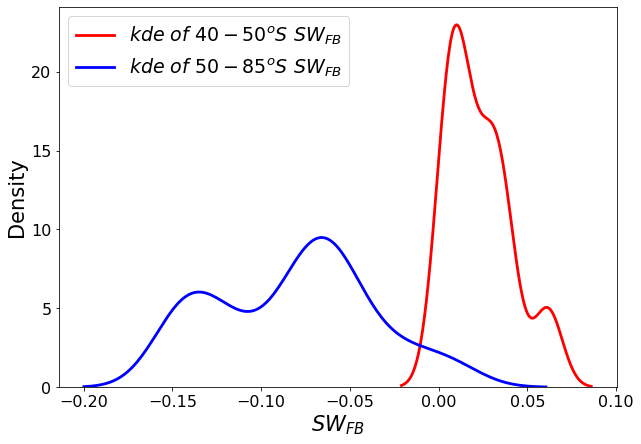

In [28]:
import seaborn as sns
# plot settings:
parameters = {'axes.labelsize': 21, 'legend.fontsize': 19,
       'axes.titlesize': 18, 'xtick.labelsize': 16, 'ytick.labelsize': 16}
plt.rcParams.update(parameters)

plt.figure(figsize = (10, 7))

sns.kdeplot((SW_FB_4050[con_list_4050] * ratio_4050), common_norm = True, bw_adjust = 0.7, linewidth = 2.8, c='red', label = r"$ kde\ of\ 40-50^{o}S\ SW_{FB} $")

sns.kdeplot((SW_FB_5085[con_list_5085] * ratio_5085), common_norm = True, bw_adjust = 0.7, linewidth = 2.8, c='blue', label = r"$ kde\ of\ 50-85^{o}S\ SW_{FB} $")

plt.legend()
plt.xlabel(r"$SW_{FB}$")
plt.savefig(path_plot + "Fig_kde_of_LatitudeBandsCostraint.jpg")

(array([ 5,  7,  6, 10, 12,  2,  1,  3,  1,  2,  1]), array([-0.27707968, -0.22707968, -0.17707968, -0.12707968, -0.07707968,
       -0.02707968,  0.02292032,  0.07292032,  0.12292032,  0.17292032,
        0.22292032,  0.27292032]))


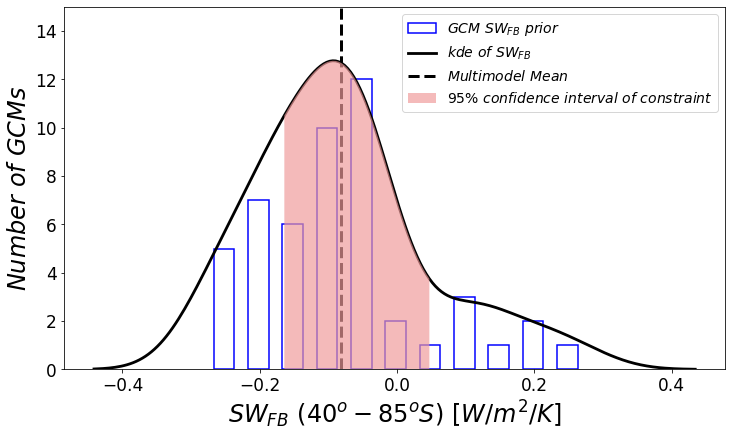

In [29]:
# kde + histogram plot: 
import seaborn as sns
parameters = {'axes.labelsize': 25, 'legend.fontsize': 16, 
         'axes.titlesize': 22,  'xtick.labelsize': 17,  'ytick.labelsize': 17}
plt.rcParams.update(parameters)

fig = plt.figure( figsize = (16.0/1.35, 12.0/1.8))
ax = fig.add_subplot(111)

# Histogram:
# bins:

xinc = 0.05
xbins = np.arange( np.min(SW_FB_4085 * ratio_4085), np.max(SW_FB_4085 * ratio_4085)+xinc, xinc )
# print(xbins)
his_SW_FB = np.histogram((SW_FB_4085 * ratio_4085), xbins)
print(his_SW_FB)
xvals = his_SW_FB[1][:-1]
ax.bar(xvals + xinc/2, his_SW_FB[0] / 3.7, edgecolor = 'b', color = [], width = .03, label = r'$ GCM\ SW_{FB}\ prior $', linewidth = 1.5)  # y-axis Scaled by 4. for visulization.

# # pdf continues line:
# fvalsx = his_SW_FB[0].astype(float)/(np.size(SW_FB_4085 ) * xinc)
# plt.plot(xvals + xinc/2, fvalsx, 'b', label = 'pdf', linewidth = 1.5)


# Kernel density estimate (seaborn kdeplot function use a Gaussian kernel):

kde_plot = sns.kdeplot((SW_FB_4085 * ratio_4085), common_norm = True, bw_adjust = 0.95, linewidth = 2.8, c = 'k', label = r'$ kde\ of\ SW_{FB}$')

# get the kernel distribution curve line for later fill:
kde_x, kde_y = kde_plot.lines[0].get_data()

ax.axvline(Mean_weighted_SWfb_SO, c = 'k', linewidth = 3., linestyle = '--', label = r'$ Multimodel\ Mean$', zorder = 97)

# ax.fill_between(kde_x, kde_y, where=(kde_x > np.min(range_SWfb_SO_before)) & (kde_x < np.max(range_SWfb_SO_before)) , 
#                 interpolate= False, facecolor = 'gray', alpha = 0.53, label = r'$ 95 \%\ range\ before\ constraint $', zorder = 98)
ax.fill_between(kde_x, kde_y, where=(kde_x > np.min(range_SWfb_SO_after)) & (kde_x < np.max(range_SWfb_SO_after)) , 
                interpolate= False, facecolor = '#EF9A9A', alpha = 0.68, label = r'$ 95 \%\ confidence\ interval\ of\ constraint $', zorder = 99)

ax.set_ylim(0, 15/3.7)
ax.set_yticks(np.arange(0, 15/3.7, 2./3.7))
ax.set_yticklabels(np.arange(0, 15, 2))

ax.set_xlabel(r"$ SW_{FB}\ (40^{o} - 85^{o} S)\ [W/ m^{2}/ K] $", fontsize = 24)
ax.set_ylabel(r"$ Number\ of\ GCMs $", fontsize = 24)

# change the order of legend:

# get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# specify order of items in legend
order = [3, 0, 1, 2]

# add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize = 14)
# plt.legend(fontsize = 11)

# plt.savefig(path_plot+ "Fig_7.jpg", bbox_inches = "tight", dpi = 500)